In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate

import warnings 
warnings.filterwarnings("ignore")

from ast import literal_eval

In [2]:
df_train = pd.read_csv('../data/train_cleaned.zip', compression='zip')
df_train.shape

(159571, 17)

In [3]:
df_test = pd.read_csv('../data/test_cleaned.zip', compression='zip')
df_test.shape

(63978, 17)

In [4]:
feature = 'tokenized_stemmed'
labels = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

In [6]:
features = df_train.columns[10:].to_list()
features

['tokenized',
 'tokenized_no_stopwords',
 'tokenized_stemmed',
 'tokenized_pos',
 'tokenized_lemmatized',
 'tokenized_lemmatized_pos',
 'tokenized_bigram']

In [37]:
#Cerco di capire quali feature sono migliori tra 'tokenized', 'stemming', 'lemma', etc.
cv_scores = dict()
scoring = ['f1_macro', 'f1_micro', 'f1_weighted', 'roc_auc', 'accuracy']

y_train = df_train[labels]
y_test = df_test[labels]

for feature in features:
    print(feature)
    X_train = df_train[feature].apply(lambda x: literal_eval(x))
    
    vect = CountVectorizer(min_df=5, max_features=15000, analyzer=lambda x: x) 
    X_train_tok = vect.fit_transform(X_train)
    
    tfidf = TfidfTransformer() 
    X_train_vec = tfidf.fit_transform(X_train_tok)
    
    ovr = OneVsRestClassifier(LogisticRegression(random_state=42))
    ovr.fit(X_train_vec, y_train)
    
    #save cv scores
    cv_scores[feature] = cross_validate(ovr, X_train_vec, y_train, cv=5, scoring=scoring)

tokenized
tokenized_no_stopwords
tokenized_stemmed
tokenized_pos
tokenized_lemmatized
tokenized_lemmatized_pos
tokenized_bigram


In [38]:
cv_scores

{'tokenized': {'fit_time': array([ 8.9947648 ,  9.59114861,  9.53595805, 11.51448202,  9.4312048 ]),
  'score_time': array([0.11343622, 0.11975765, 0.12645864, 0.1207602 , 0.11692381]),
  'test_f1_macro': array([0.4940294 , 0.49592693, 0.50056245, 0.51773331, 0.50245811]),
  'test_f1_micro': array([0.68061391, 0.67977626, 0.68958914, 0.6902624 , 0.68425666]),
  'test_f1_weighted': array([0.67176616, 0.67105601, 0.68190966, 0.68272664, 0.67469674]),
  'test_roc_auc': array([0.98136143, 0.97588856, 0.97755333, 0.97954575, 0.97795945]),
  'test_accuracy': array([0.91709228, 0.91931441, 0.92053644, 0.92025443, 0.92078712])},
 'tokenized_no_stopwords': {'fit_time': array([6.75444365, 6.37364197, 6.03319263, 7.48558116, 6.35300207]),
  'score_time': array([0.09704804, 0.10268569, 0.10076404, 0.10346293, 0.10166883]),
  'test_f1_macro': array([0.47693017, 0.481256  , 0.48777495, 0.50771087, 0.4897678 ]),
  'test_f1_micro': array([0.67348517, 0.67486603, 0.68006318, 0.68536264, 0.67467963]),
 

In [53]:
for feature in features:
    mean = np.mean(cv_scores[feature]['test_roc_auc'])
    print('ROC_AUC score for', feature, mean)

ROC_AUC score for tokenized 0.9784617018582003
ROC_AUC score for tokenized_no_stopwords 0.977801621707059
ROC_AUC score for tokenized_stemmed 0.9789924163893124
ROC_AUC score for tokenized_pos 0.9713802486378054
ROC_AUC score for tokenized_lemmatized 0.9785485381178642
ROC_AUC score for tokenized_lemmatized_pos 0.9785199717919767
ROC_AUC score for tokenized_bigram 0.8237707345854236


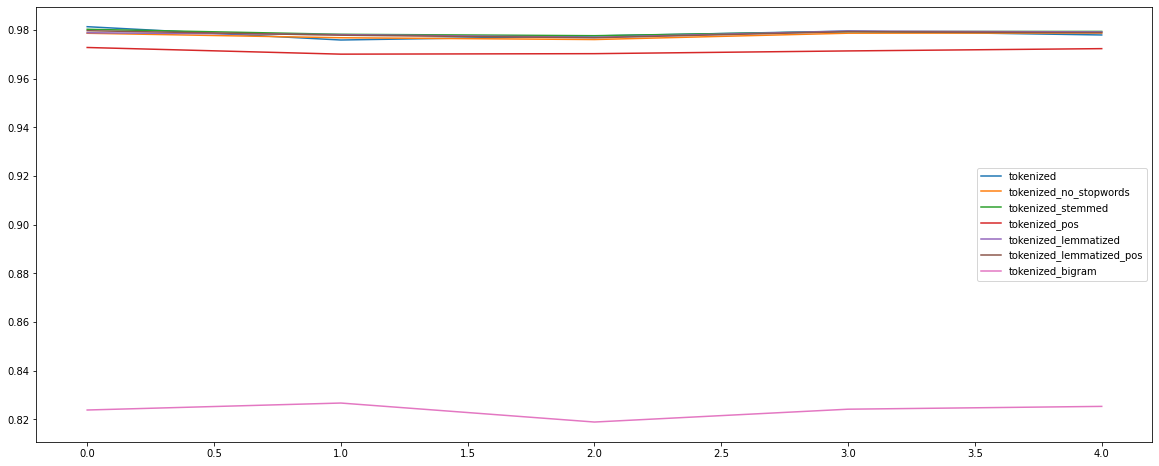

In [58]:
plt.figure(figsize=(20,8))
for feature in features:
    plt.plot(cv_scores[feature]['test_roc_auc'], label=feature)
    
plt.legend()
plt.show()

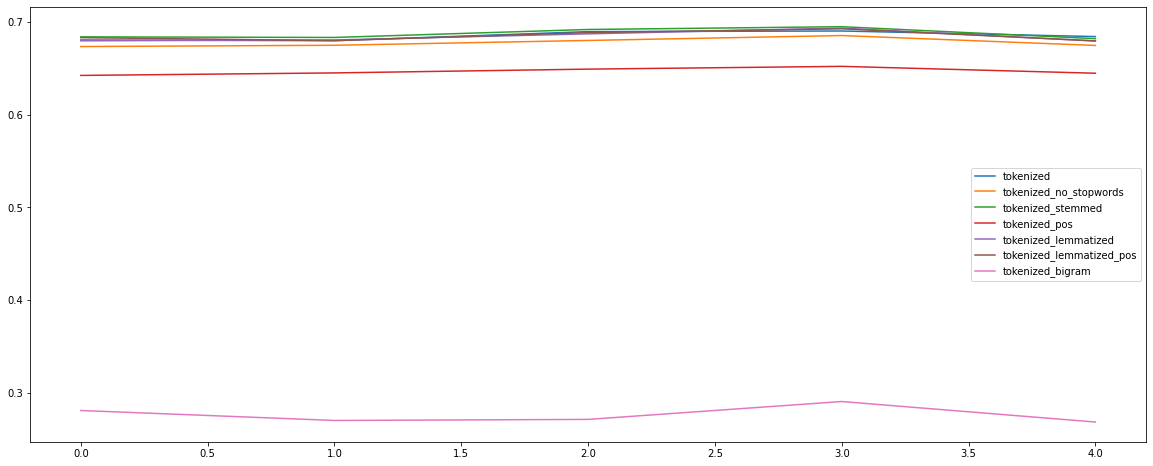

In [59]:
plt.figure(figsize=(20,8))
for feature in features:
    plt.plot(cv_scores[feature]['test_f1_micro'], label=feature)
    
plt.legend()
plt.show()

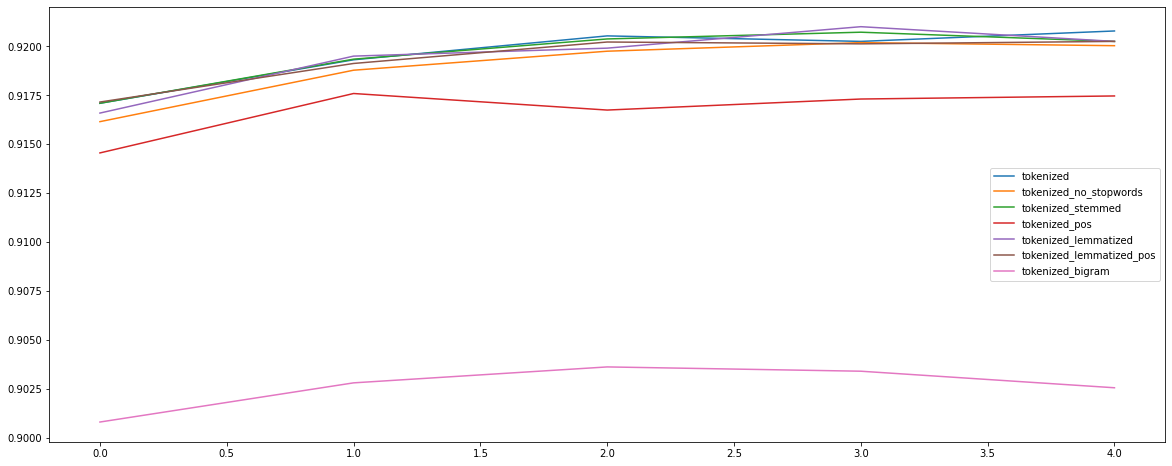

In [60]:
plt.figure(figsize=(20,8))
for feature in features:
    plt.plot(cv_scores[feature]['test_accuracy'], label=feature)
    
plt.legend()
plt.show()